# Step 1: Import Python Libraries
The first step involved in Data PreProcessing is understanding and playing around with our data using libraries.
Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.
->Pandas and Numpy have been used for Data Manipulation and numerical Calculations
->Matplotlib and Seaborn have been used for Data visualizations. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Reading Dataset
The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In [3]:
data = pd.read_csv("styles.csv",on_bad_lines='skip')
data

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


# Analyzing the Data


In [4]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
data.tail()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume
44423,51623,Women,Accessories,Watches,Watches,Pink,Winter,2016.0,Casual,Fossil Women Pink Dial Chronograph Watch ES3050


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


# Check for Duplication

In [8]:
data.nunique()

id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64

# Missing Values Calculation

In [45]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
id,0,0.000000
gender,0,0.000000
masterCategory,0,0.000000
subCategory,0,0.000000
articleType,0,0.000000
baseColour,15,0.018118
season,21,0.025365
year,1,0.001208
usage,317,0.382896
productDisplayName,7,0.008455


Statistical description of numerical variables

In [46]:
data.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


# Figuring the outliers for replacing the null values

<Axes: >

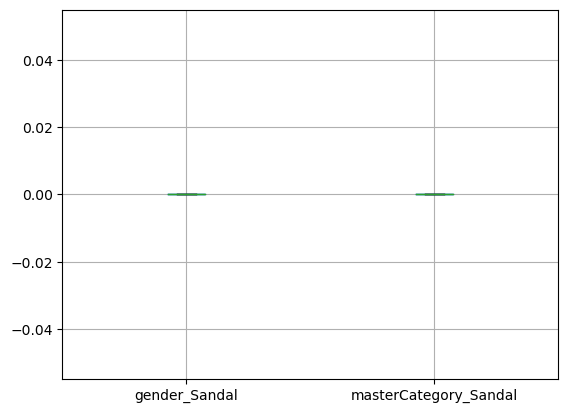

In [35]:
data.boxplot()

In [50]:
#There is not outlier in the dataset, So replacing the null values with mode.
data["year"] = data["year"].fillna(data["year"].median())

In [51]:
data.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    0
usage                 317
productDisplayName      7
dtype: int64

In [52]:
import seaborn as sns

# Univariate Analysis

<Axes: xlabel='gender', ylabel='count'>

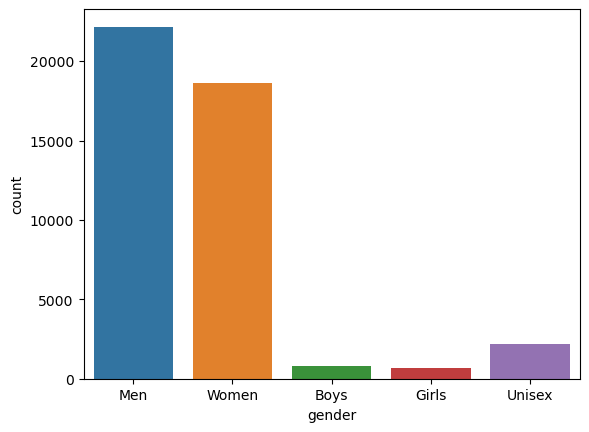

In [37]:
sns.countplot(x="gender",data=data)

In [54]:
# return the percentage of different genders
data["gender"].value_counts()/len(data)*100

gender
Men       49.853683
Women     41.939042
Unisex     4.864488
Boys       1.868359
Girls      1.474428
Name: count, dtype: float64

<Axes: xlabel='masterCategory', ylabel='count'>

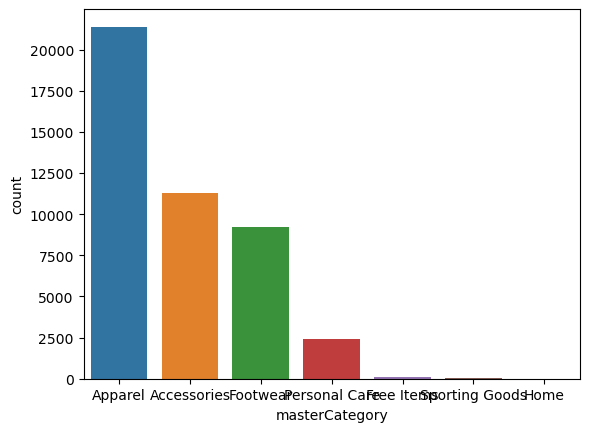

In [36]:
sns.countplot(x="masterCategory",data=data)

In [56]:
# return the percentage of different genders
data["masterCategory"].value_counts()/len(data)*10

masterCategory
Apparel           4.816541
Accessories       2.537817
Footwear          2.075230
Personal Care     0.540924
Free Items        0.023636
Sporting Goods    0.005628
Home              0.000225
Name: count, dtype: float64

In [31]:
data.groupby(['gender']).count()

,masterCategory,subCategory,articleType,baseColour,usage,gender_Sandal,masterCategory_Sandal
gender,,,,,,,
Boys,830,830,830,830,830,830,830
Girls,655,655,655,655,655,655,655
Men,22165,22165,22165,22154,22141,22165,22165
Unisex,2164,2164,2164,2164,2135,2164,2164
Women,18632,18632,18632,18628,18368,18632,18632


In [32]:
data.groupby(['subCategory']).count()

,gender,masterCategory,articleType,baseColour,usage,gender_Sandal,masterCategory_Sandal
subCategory,,,,,,,
Accessories,143,143,143,143,143,143,143
Apparel Set,106,106,106,106,106,106,106
Bags,3055,3055,3055,3055,3055,3055,3055
Bath and Body,12,12,12,12,9,12,12
Beauty Accessories,4,4,4,4,3,4,4
Belts,811,811,811,811,811,811,811
Bottomwear,2694,2694,2694,2688,2692,2694,2694
Cufflinks,108,108,108,108,108,108,108
Dress,478,478,478,478,478,478,478


In [44]:
data.groupby(['usage']).count()

,gender,masterCategory,subCategory,articleType,baseColour,gender_Sandal,masterCategory_Sandal
usage,,,,,,,
Casual,34414,34414,34414,34414,34407,34414,34414
Ethnic,3208,3208,3208,3208,3208,3208,3208
Formal,2359,2359,2359,2359,2359,2359,2359
Home,1,1,1,1,1,1,1
Party,29,29,29,29,29,29,29
Smart Casual,67,67,67,67,67,67,67
Sports,4025,4025,4025,4025,4025,4025,4025
Travel,26,26,26,26,26,26,26


In [ ]:
data.groupby(['gender']).count()

# Multivariate Analysis

In [63]:
sns.countplot("masterCategory",hue="productDisplayName",data=data)

TypeError: countplot() got multiple values for argument 'data'

In [67]:
# To Find the count of different features
pd.crosstab(data["masterCategory"],data["productDisplayName"])

productDisplayName,109F Blue A-Line Dress,109F Red & White A-Line Dress,109F Women Beige Embroidered Top,109F Women Black & Cream Dress,109F Women Black & Cream-Coloured Colourblocked Printed Tunic,109F Women Black & White Top,109F Women Black Embellished Tunic,109F Women Black Printed Kaftan Tunic,109F Women Black Printed Tunic,109F Women Blue & Green Polka Dot Print Tunic,...,s.Oliver Women's Department Refined Red T-shirt,s.Oliver Women's Green Blouse Shirt,s.Oliver Women's Printed Top Blue T-shirt,s.Oliver Women's Purple Blouse Top,s.Oliver Women's Sky Blue Top,s.Oliver Women's Striped Light Blue Top,s.Oliver Women's Tank Brown Top,s.Oliver Women's White Blouse Top,test dispName,united Colors Of Benetton Women Grey Tight
masterCategory,,,,,,,,,,,,,,,,,,,,,
Accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Apparel,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
Footwear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Free Items,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Home,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Personal Care,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sporting Goods,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# To Find the count of different features
pd.crosstab(data["subCategory"],data["productDisplayName"])

productDisplayName,109F Blue A-Line Dress,109F Red & White A-Line Dress,109F Women Beige Embroidered Top,109F Women Black & Cream Dress,109F Women Black & Cream-Coloured Colourblocked Printed Tunic,109F Women Black & White Top,109F Women Black Embellished Tunic,109F Women Black Printed Kaftan Tunic,109F Women Black Printed Tunic,109F Women Blue & Green Polka Dot Print Tunic,...,s.Oliver Women's Department Refined Red T-shirt,s.Oliver Women's Green Blouse Shirt,s.Oliver Women's Printed Top Blue T-shirt,s.Oliver Women's Purple Blouse Top,s.Oliver Women's Sky Blue Top,s.Oliver Women's Striped Light Blue Top,s.Oliver Women's Tank Brown Top,s.Oliver Women's White Blouse Top,test dispName,united Colors Of Benetton Women Grey Tight
subCategory,,,,,,,,,,,,,,,,,,,,,
Accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apparel Set,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Bath and Body,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beauty Accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bottomwear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Cufflinks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dress,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering

# one hot encoding for categorical data

In [12]:
# let's have a look at how many labels each variable has
for col in data.columns:
    print(col,': ',len(data[col].unique()))

id :  44424
gender :  5
masterCategory :  7
subCategory :  45
articleType :  143
baseColour :  47
season :  5
year :  14
usage :  9
productDisplayName :  31122


In [13]:
# Let's examine how many columns we will obtain after one hot encoding these varaiables
pd.get_dummies(data,drop_first=True).shape

(44424, 31373)

In [17]:
# let's find the top 10 most frequent categories for the variable masterCategory
data.masterCategory.value_counts().sort_values(ascending=False).head(20)

masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

In [18]:
# let's find the top 10 most frequent categories for the variable subCategory
data.subCategory.value_counts().sort_values(ascending=False).head(20)

subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Name: count, dtype: int64

In [19]:
# let's find the top 10 most frequent categories for the variable articleType
data.articleType.value_counts().sort_values(ascending=False).head(20)

articleType
Tshirts                  7067
Shirts                   3217
Casual Shoes             2845
Watches                  2542
Sports Shoes             2036
Kurtas                   1844
Tops                     1762
Handbags                 1759
Heels                    1323
Sunglasses               1073
Wallets                   936
Flip Flops                914
Sandals                   897
Briefs                    849
Belts                     813
Backpacks                 724
Socks                     686
Formal Shoes              637
Perfume and Body Mist     613
Jeans                     609
Name: count, dtype: int64

In [21]:
# Let's make a list woth the most frequent categories of the variable

top_10 = [x for x in data.subCategory.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Topwear',
 'Shoes',
 'Bags',
 'Bottomwear',
 'Watches',
 'Innerwear',
 'Jewellery',
 'Eyewear',
 'Fragrance',
 'Sandal']

In [23]:
# and now we make the 10 binary variables
for label in top_10:
    data[label] = np.where(data['subCategory']==label,1,0)
data[['subCategory']+top_10].head(20)

,subCategory,Topwear,Shoes,Bags,Bottomwear,Watches,Innerwear,Jewellery,Eyewear,Fragrance,Sandal
0,Topwear,1,0,0,0,0,0,0,0,0,0
1,Bottomwear,0,0,0,1,0,0,0,0,0,0
2,Watches,0,0,0,0,1,0,0,0,0,0
3,Bottomwear,0,0,0,1,0,0,0,0,0,0
4,Topwear,1,0,0,0,0,0,0,0,0,0
5,Topwear,1,0,0,0,0,0,0,0,0,0
6,Topwear,1,0,0,0,0,0,0,0,0,0
7,Topwear,1,0,0,0,0,0,0,0,0,0
8,Socks,0,0,0,0,0,0,0,0,0,0
9,Watches,0,0,0,0,1,0,0,0,0,0


In [28]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    #function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for lable in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label,1,0)
        
#read the data again
data = pd.read_csv('styles.csv',usecols=['gender','masterCategory','subCategory','articleType','baseColour','usage'])

#encode  into the 10 most frequent categories
one_hot_top_x(data,'subCategory',top_10)
data.head()

,gender,masterCategory,subCategory,articleType,baseColour,usage,gender_Sandal
0,Men,Apparel,Topwear,Shirts,Navy Blue,Casual,0
1,Men,Apparel,Bottomwear,Jeans,Blue,Casual,0
2,Women,Accessories,Watches,Watches,Silver,Casual,0
3,Men,Apparel,Bottomwear,Track Pants,Black,Casual,0
4,Men,Apparel,Topwear,Tshirts,Grey,Casual,0


In [29]:
# find the 10 most frequent categories for masterCategory

top_10 = [x for x in data.masterCategory.value_counts().sort_values(ascending=False).head(10).index]

# now create the 10 most frequent dummy variables for masterCategory
one_hot_top_x(data,'masterCategory',top_10)
data.head()

,gender,masterCategory,subCategory,articleType,baseColour,usage,gender_Sandal,masterCategory_Sandal
0,Men,Apparel,Topwear,Shirts,Navy Blue,Casual,0,0
1,Men,Apparel,Bottomwear,Jeans,Blue,Casual,0,0
2,Women,Accessories,Watches,Watches,Silver,Casual,0,0
3,Men,Apparel,Bottomwear,Track Pants,Black,Casual,0,0
4,Men,Apparel,Topwear,Tshirts,Grey,Casual,0,0


# Statistics Summary

In [ ]:
#describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float
data.describe().T

In [ ]:
#describe(include=’all’) provides a statistics summary of all data, include object, category etc
data.describe(include='all').T

In [14]:
#Before we do EDA, lets separate Numerical and categorical variables for easy analysis
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage', 'productDisplayName'],
      dtype='object')
Numerical Variables:
['id', 'year']


In [ ]:
#EDA Univariate Analysis
In the below fig, a histogram and box plot is used to show the pattern of the variables, 
as some variables have skewness and outliers.

id
Skew : 0.11


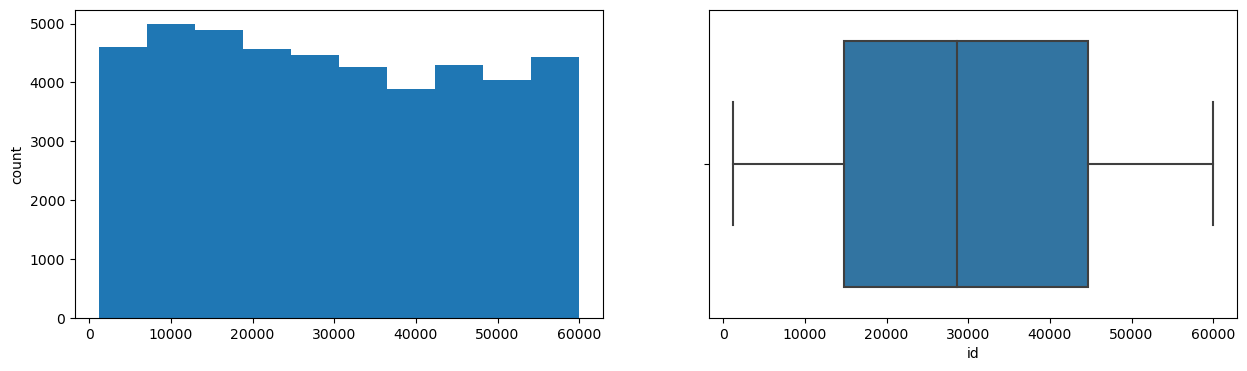

year
Skew : 0.92


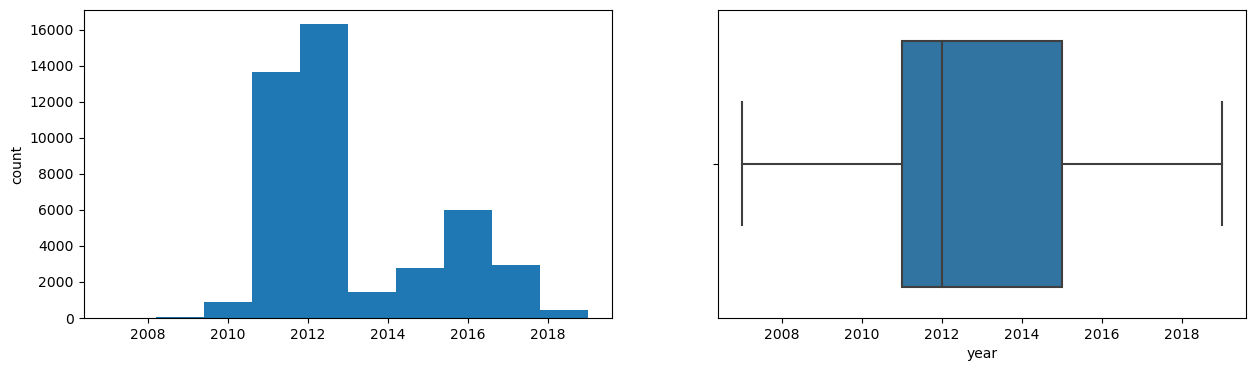

In [15]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/82790)*100})
missing_data